<a href="https://colab.research.google.com/github/bekkahmoore/Numerical-Methods/blob/main/project6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 6
#LINEAR REGRESSION
Linear regression is an approach to model the relationship between a scalar response and single or multiple explanatory variables.
There are Simple Linear Regresion with one variables in it and Multiple Linear Regression with two variables in it.


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pa


%matplotlib inline

In [ ]:
data = pa.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/supermarket_sales.csv')


#Data
Now we will input our data.

In [ ]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


#Plotting The Graph
We will plot the linear regression graph with the data provided above.

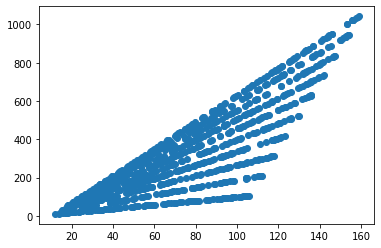

In [ ]:
plt.scatter(data["Unit price"]+data["Quantity"]+data["Tax 5%"],data["Total"])

In [ ]:
kstats.pearsonr(data["Unit price"]+data["Quantity"]+data["Tax 5%"],data["Total"])

(0.8507801575906174, 4.18608030869628e-281)

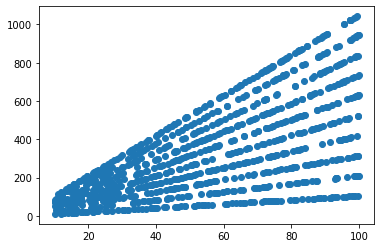

In [ ]:
plt.scatter(data["Unit price"],data["Total"])

In [ ]:
stats.pearsonr(data["Unit price"],data["Total"])

(0.6339620885890692, 1.60995209236489e-113)

#Drawing Regression Line
we will draw the regression lines  by using the scipy stats package.$$
we have,$$
 a regression of the form,
 $\hat y = a_0+a_1 x$
$$
a_1=\frac{\sum x_i y_i -n \bar x \bar y}{\sum x_i^2 - n\bar x ^2}
$$
and $$
a_0 = \bar y - a_1 \bar x
$$


In [ ]:
def sum(l):
  total = 0
  for i in l:
    total = total + i
  return total

def squareAndSum(l1,l2):
  total = 0
  for i in range(len(l1)):
    total = total + l1[i]*l2[i]
  return total

In [ ]:
n = len(data['Unit price'])
xbar = sum(data['Unit price'])/n
ybar = sum(data['Total'])/n
xy = squareAndSum(data['Unit price'],data['Total'])
xx = squareAndSum(data['Unit price'],data['Total'])

a1 = (xy-n*xbar*ybar)/(xx-n*xbar**2)
a0 = ybar - a1*xbar

In [ ]:
def fomulaRegression(variable,slope, intercept):
  return variable*slope+intercept

In [ ]:
print(a1)
a0

0.21707559992020736


310.8816879814143

In [ ]:
stats.linregress(data["Unit price"],data["Total"])

LinregressResult(slope=5.883531504840838, intercept=-4.581981796594846, rvalue=0.633962088589069, pvalue=1.6099520923650332e-113, stderr=0.22719226818258975)

In [ ]:
km = stats.linregress(data["Unit price"],data["Total"])[0]
b = stats.linregress(data["Unit price"],data["Total"])[1]
def y(x):
    return(m*x+b)

In [ ]:
y(4)


18.952144222768506

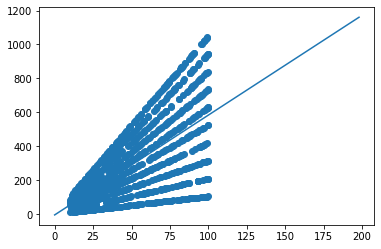

In [ ]:
x = np.arange( 0,200,2)
plt.scatter(data["Unit price"],data["Total"])
plt.plot(x,y(x))

In [ ]:
s = 0
for i in range (0,len(data["Unit price"])):
    s = s+y(data["Unit price"][i])-data["Total"][i]

In [ ]:
s

-6.843947630841285e-11

In [ ]:
ss = 0
for i in range (0,len(data["Unit price"])):
    ss = ss+(y(data["Unit price"][i])-data["Total"][i])**2

In [ ]:
ss

36124245.73765418

# Was it appropriate to perform linear regression?
Linear regression is actually approriate to perform in this because the dependent Y variable has a linear relationship with the independent variable X. To confirm, the XY scatter plot is linear as well as the residual plot has a random pattern.

#***Nonlinear Regression***#

Two columns that I feel have a nonlinear relationship are the Quantity purchased and Rating. I will display that with a scatterplot below. My hypothesis is that the relationship between the two data columns is "the higher quantity people order, the higher their rating". Ordering more must indicate the consumer likes the product, and a high rating would reflect that. 

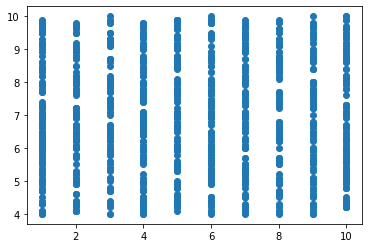

In [ ]:
plt.scatter(data["Quantity"],data["Rating"])

In [ ]:
x = sum(data['Quantity'])
xx = squareAndSum(data['Quantity'],data['Quantity'])
xxx = squareAndSum(data['Quantity']**2,data['Quantity'])
xxxx = squareAndSum(data['Quantity']**3,data['Quantity'])

M = [[n,x,xx,sum(data['Rating'])]
          ,[x,xx,xxx,squareAndSum(data['Quantity'],data['Rating'])]
          ,[xx,xxx,xxxx,squareAndSum(data['Quantity']**2,data['Rating'])]
          ]

using the definition of Gauss Jordan Methods and Matrices:

In [ ]:
def adding_row(M,select_Row, modifierRow, V):
  new_Row = M[select_Row,:]+V*M[modifierRow,:]
  newMatrix = []
  for i in range(len(M)):
    if i != select_Row:
      newMatrix.append(M[i,:])
    else:
      newMatrix.append(new_Row)
  return np.array(newMatrix)

def Multiplying(M,row,constant):
  newMatrix =[]
  for i in range(len(M)):
    if i != row:
      newMatrix.append(M[i,:])
    else:
      newMatrix.append(1/M[row,constant]*M[row,:])
  return np.array(newMatrix)
  
def gaussJordan(M):
  newMatrix = M
  for pivot in range(len(M)):
    newMatrix = Multiplying(newMatrix,pivot,pivot)
    for column in range(0,pivot):
      newMatrix = adding_row(newMatrix,column,pivot,-newMatrix[column,pivot])
    for column in range(pivot+1,len(M)):
      newMatrix = adding_row(newMatrix,column,pivot,-newMatrix[column,pivot])
  return newMatrix 


In [ ]:
gaussJordan(np.array(M))

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         6.88515893e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         6.03553681e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        -6.29896167e-03]])

In [ ]:
def rowDeveloper(input,order):
  row = []
  for i in range(order+1):
    row.append(input**i)
  return row

def matrixDeveloper(list, order):
  matrix = []
  for i in list:
    matrix.append(rowDeveloper(i,order))
  return matrix

In [ ]:
A = np.array(matrixDeveloper(data['Quantity'],2))
y = np.array(data['Rating'])

In [ ]:
np.linalg.inv(np.transpose(A)@ A)@ np.transpose(A)@ y

array([ 6.88515893e+00,  6.03553681e-02, -6.29896167e-03])

In [ ]:
results = np.linalg.inv(np.transpose(A)@ A)@ np.transpose(A)@ y

def quadRegression(x):
  return results[0]+x*results[1]+results[2]*x**2

#Plotting graph

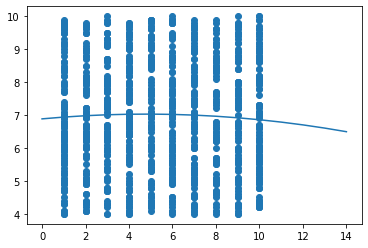

In [ ]:
x = np.arange( 0,15,1)
plt.scatter(data["Quantity"],data["Rating"])
plt.plot(x,quadRegression(x))

#Non linear Regression Findings:
The graph of the non linear regression was good. We used the scatter plot to draw the graph and it fit as per our expectation.